In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

# 統計モデリング

## 統計モデルの構築手順例
---
必ずしも確立された手順があるわけではないが、統計モデルを構築する際に踏む手順の一例を示す。

1. 全体像を描く
 - IMRAD形式 (Introduction, Methods, Results And Discussion) などでレポートの雛形を作り、やるべきこと (欠けている部分を埋めるにはどうするか) を明確にする
    - Introduction - 背景・目的の説明、分析の位置づけ
      - ここが欠けている場合、先行研究調査・ドメイン知識の獲得
    - Methods - 母集団、標本抽出方法、分析手法 (他人が再現できるレベルで記述)
      - ここが欠けている場合、先行研究・隣接分野の分析で使用されたものの調査
    - Results - 分析から得られた客観的事実
      - ここが欠けている場合、モデル式からシミュレーションしたデータを作成
    - Discussion - Introduction と Results を結ぶ論理・自分の考え
      - ここが欠けている場合、仮説設定
1. 分析の目的を設定する
1. データを集める
 - データが利用可能か確認
    - アクセス権があるか、使いものになるか
 - 欠けているデータが集められるか検討
    - 新規にデータを集める仕組みを作れるか、期限は間に合うか、費用はまかなえるか
    - 外部データで利用可能なものはあるか
1. データを可視化する・探索的データ解析 (EDA, Exploratory Data Analysis)
1. データの背後にあるメカニズムを考える
1. メカニズムをモデル式に落とし込む
1. モデル式のパラメータをいろいろ変えながらシミュレーション
 - 自分の立てたモデル式の性質を把握
1. パラメータを推定
1. 得られた統計モデルを検証する

## 変数追加によるモデルの変化

### 交互作用 (interaction)
---
2つ以上の変数が組み合わさることで、単独では生じなかった**相乗効果** (または打ち消し合う負の効果) が表れることを交互作用という。交互作用の影響を取り除いた単独の変数での効果を主効果という。  
統計モデルでは交互作用は変数同士の積で表すことが多い。

#### 質的変数×質的変数
---
質的変数同士の交互作用は、変数が組み合わさったときの**目的変数の平均の差**として表れる。

具体的に、喫煙の有無を表す変数 $x_{1}$ と飲酒の有無を表す変数 $x_{2}$ で特定の病気にかかるリスク $y$ への影響を表すモデルを考える。

<table class="text-center border">
    <tr>
        <th>$x_{1}$(喫煙 : あり=1,なし=0)</th>
        <th>$x_{2}$(飲酒 : あり=1,なし=0)</th>
        <th>$y$</th>
    </tr>
    <tr>
        <td>1</td>
        <td>1</td>
        <td>0.9</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>0.5</td>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td>0.4</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0.1</td>
    </tr>
</table>

交互作用を考えない場合、モデル式は $y=a_{0} +a_{1} x_{1} +a_{2} x_{2}$ であり、データを当てはめると $y=0.075+0.45x_{1} +0.35x_{2}$ となる。

<table class="text-center border">
    <tr>
        <th>$x_{1}$</th>
        <th>$x_{2}$</th>
        <th style="min-width: 10em;">モデル式</th>
        <th>$\hat{y}$</th>
    </tr>
    <tr>
        <td>1</td>
        <td>1</td>
        <td class="text-left">$y=a_{0} +a_{1} +a_{2}$</td>
        <td class="text-right">$0.075+0.45+0.35=0.875$</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td class="text-left">$y=a_{0} +a_{1}$</td>
        <td class="text-right">$0.075+0.45=0.525$</td>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td class="text-left">$y=a_{0} +a_{2}$</td>
        <td class="text-right">$0.075+0.35=0.425$</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td class="text-left">$y=a_{0}$</td>
        <td class="text-right">$0.075$</td>
    </tr>
</table>

交互作用を表す $x_{1} x_{2}$ を加えると、モデル式は $y=a_{0} +a_{1} x_{1} +a_{2} x_{2} +a_{3} x_{1} x_{2}$ であり、データを当てはめると $y=0.1+0.4x_{1} +0.3x_{2} +0.1x_{1} x_{2}$ となる。

<table class="text-center border">
    <tr>
        <th>$x_{1}$</th>
        <th>$x_{2}$</th>
        <th style="min-width: 12.5em;">モデル式</th>
        <th>$\hat{y}$</th>
    </tr>
    <tr>
        <td>1</td>
        <td>1</td>
        <td class="text-left">$y=a_{0} +a_{1} +a_{2} +a_{3}$</td>
        <td class="text-right">$0.1+0.4+0.3+0.1=0.9$</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td class="text-left">$y=a_{0} +a_{1}$</td>
        <td class="text-right">$0.1+0.4=0.5$</td>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td class="text-left">$y=a_{0} +a_{2}$</td>
        <td class="text-right">$0.1+0.3=0.4$</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td class="text-left">$y=a_{0}$</td>
        <td class="text-right">$0.1$</td>
    </tr>
</table>

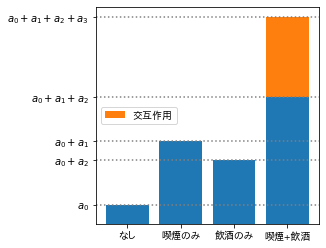

In [2]:
from my_functions.statistical_modeling import interaction_quality_quality
interaction_quality_quality.show()

ダミー変数化した場合、交互作用を表す変数の追加は**元の変数の単位で行う**。  
例えば、色 (赤・緑・青) とサイズ (S・M・L) の2変数があった場合、ダミー変数化すると緑・青・M・Lのように4変数になるが、交互作用を表す変数は緑×M・緑×L・青×M・青×Lの4つ。誤って緑×青やM×Lのような変数を作らないように注意する。

モデル式は、 $y=a_{0} +a_{緑} x_{緑} +a_{青} x_{青} +a_{M} x_{M} +a_{L} x_{L} +a_{緑M} x_{緑M} +a_{緑L} x_{緑L} +a_{青M} x_{青M} +a_{青L} x_{青L}$ となり、元の変数に戻して効果を比較すると以下のようになる。

<table class="text-center border">
    <tr>
        <th>色</th>
        <th>サイズ</th>
        <th>$\hat{y}$</th>
    </tr>
    <tr>
        <td>赤</td>
        <td>S</td>
        <td class="text-left">$a_{0}$</td>
    </tr>
    <tr>
        <td>赤</td>
        <td>M</td>
        <td class="text-left">$a_{0} +a_{M}$</td>
    </tr>
    <tr>
        <td>赤</td>
        <td>L</td>
        <td class="text-left">$a_{0} +a_{L}$</td>
    </tr>
    <tr>
        <td>緑</td>
        <td>S</td>
        <td class="text-left">$a_{0} +a_{緑}$</td>
    </tr>
    <tr>
        <td>緑</td>
        <td>M</td>
        <td class="text-left">$a_{0} +a_{緑} +a_{M} +a_{緑M}$</td>
    </tr>
    <tr>
        <td>緑</td>
        <td>L</td>
        <td class="text-left">$a_{0} +a_{緑} +a_{L} +a_{緑L}$</td>
    </tr>
    <tr>
        <td>青</td>
        <td>S</td>
        <td class="text-left">$a_{0} +a_{青}$</td>
    </tr>
    <tr>
        <td>青</td>
        <td>M</td>
        <td class="text-left">$a_{0} +a_{青} +a_{M} +a_{青M}$</td>
    </tr>
    <tr>
        <td>青</td>
        <td>L</td>
        <td class="text-left">$a_{0} +a_{青} +a_{L} +a_{青L}$</td>
    </tr>
</table>

このように、交互作用項が増えていくと係数の意味や何と比較しての効果なのかが**解釈しにくくなる**ので、闇雲に交互作用項を追加してはいけない。

#### 質的変数×量的変数
---
質的変数と量的変数の交互作用は、カテゴリごとの**回帰直線の傾きの違い**として表れる。

具体的に、収入を表す量的変数 $x_{1}$ と年代 (20代・30代・40代) を表す質的変数 $x_{2}$ で消費金額 $y$ への影響を表すモデルを考える。  
年代のダミー変数 $x_{3} ,x_{4}$ を導入すると、交互作用を考えないモデル式は $y=a_{0} +a_{1} x_{1} +a_{2} x_{3} +a_{3} x_{4}$ となる。

<table class="text-center border">
    <tr>
        <th>年代</th>
        <th style="min-width: 12.5em;">モデル式</th>
    </tr>
    <tr>
        <td>20代</td>
        <td class="text-left">$y=a_{0} +a_{1} x_{1}$</td>
    </tr>
    <tr>
        <td>30代</td>
        <td class="text-left">$y=a_{0} +a_{1} x_{1} +a_{2} x_{3}$</td>
    </tr>
    <tr>
        <td>40代</td>
        <td class="text-left">$y=a_{0} +a_{1} x_{1} +a_{3} x_{4}$</td>
    </tr>
</table>

交互作用を表す $x_{1} x_{3} ,x_{1} x_{4}$ を加えると、モデル式は $y=a_{0} +a_{1} x_{1} +a_{2} x_{3} +a_{3} x_{4} +a_{4} x_{1} x_{3} +a_{5} x_{1} x_{4}$ となる。

<table class="text-center border">
    <tr>
        <th>年代</th>
        <th style="min-width: 14.5em;">モデル式</th>
    </tr>
    <tr>
        <td>20代</td>
        <td class="text-left">$y=a_{0} +a_{1} x_{1}$</td>
    </tr>
    <tr>
        <td>30代</td>
        <td class="text-left">$y=a_{0} +a_{2} +( a_{1} +a_{4}) x_{1}$</td>
    </tr>
    <tr>
        <td>40代</td>
        <td class="text-left">$y=a_{0} +a_{3} +( a_{1} +a_{5}) x_{1}$</td>
    </tr>
</table>

このように、収入 $x_{1}$ に対して年代ごとに異なる傾き (この場合は消費性向のようなもの) を表せる。

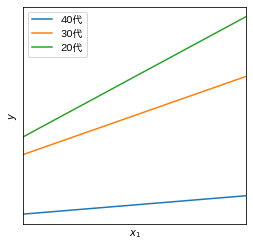

In [3]:
from my_functions.statistical_modeling import interaction_quality_quantity
interaction_quality_quantity.show()

#### 量的変数×量的変数
---
量的変数同士の交互作用は直観的にわかりにくいが、片方を[離散化](discretization.ipynb)して考えれば質的変数×量的変数の回帰直線の傾きの違いに加えて、変数の値に応じて一定速度で回帰直線の傾きが動くという仮定を置いていると捉えられる。  
実際にはこのような仮定は限定的すぎたり、結果の解釈が非常に難しいので、片方を名義尺度または順序尺度の変数に**離散化したほうがいい**場合も多い。

#### Pythonでの交互作用項の作成方法
---
`patsy`の[formula](https://patsy.readthedocs.io/en/latest/formulas.html)を使用する。単純な全組み合わせであれば[`sklearn.preprocessing.PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)でもよい。

##### formulaの基本
---
`~`の左側に目的変数・右側に説明変数を記述する。変数が複数ある場合は、`+`で繋ぐ。 (formulaの場合、切片項は自動的に追加される)

使用例  
$y=a_{0} +a_{1} x_{1} +a_{2} x_{2}$ という回帰式は`y ~ x1 + x2`で表される。

In [4]:
mpg = sns.load_dataset('mpg').dropna()
print('mpg')
display(mpg)

mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [5]:
smf.ols('mpg ~ horsepower + acceleration', mpg).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     331.7
Date:                Sun, 17 May 2020   Prob (F-statistic):           8.67e-85
Time:                        11:42:00   Log-Likelihood:                -1166.1
No. Observations:                 392   AIC:                             2338.
Df Residuals:                     389   BIC:                             2350.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       52.5593      2.587     20.316      0.000      47.473      57.646
horsepower      -0.1880      0.009    -21.788      0.000      -0.205      -0.171
acceleration    -0.6098      0.120     -5.066      0.000      -0.846      -0.373
==============================================================================
Omnibus:                       31.573   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.488
Skew:                           0.685   Prob(JB):                     7.24e-09
Kurtosis:                       3.647   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# 比較用
sm.OLS(mpg['mpg'], sm.add_constant(mpg[['horsepower',
                                        'acceleration']])).fit().summary()

/root/local/python-3.7.4/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     331.7
Date:                Sun, 17 May 2020   Prob (F-statistic):           8.67e-85
Time:                        11:42:00   Log-Likelihood:                -1166.1
No. Observations:                 392   AIC:                             2338.
Df Residuals:                     389   BIC:                             2350.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           52.5593      2.587     20.316      0.000      47.473      57.646
horsepower      -0.1880      0.009    -21.788      0.000      -0.205      -0.171
acceleration    -0.6098      0.120     -5.066      0.000      -0.846      -0.373
==============================================================================
Omnibus:                       31.573   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.488
Skew:                           0.685   Prob(JB):                     7.24e-09
Kurtosis:                       3.647   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### カテゴリ変数の扱い
---
`str`型と`bool`型の変数は自動的にカテゴリ変数として扱われる。

In [7]:
smf.ols('mpg ~ origin', mpg).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     96.60
Date:                Sun, 17 May 2020   Prob (F-statistic):           8.67e-35
Time:                        11:42:00   Log-Likelihood:                -1282.2
No. Observations:                 392   AIC:                             2570.
Df Residuals:                     389   BIC:                             2582.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          27.6029      0.776     35.587      0.000      26.078      29.128
origin[T.japan]     2.8477      1.058      2.691      0.007       0.767       4.928
origin[T.usa]      -7.5695      0.877     -8.634      0.000      -9.293      -5.846
==============================================================================
Omnibus:                       26.330   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.217
Skew:                           0.679   Prob(JB):                     2.74e-07
Kurtosis:                       3.066   Cond. No.                         5.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

数値型の変数をカテゴリ変数として扱いたい場合は、`C`関数を使用する。

In [8]:
smf.ols('mpg ~ C(cylinders)', mpg).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sun, 17 May 2020   Prob (F-statistic):           8.79e-85
Time:                        11:42:00   Log-Likelihood:                -1160.3
No. Observations:                 392   AIC:                             2331.
Df Residuals:                     387   BIC:                             2350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            20.5500      2.349      8.747      0.000      15.931      25.169
C(cylinders)[T.4]     8.7339      2.373      3.681      0.000       4.069      13.399
C(cylinders)[T.5]     6.8167      3.589      1.899      0.058      -0.239      13.873
C(cylinders)[T.6]    -0.5765      2.405     -0.240      0.811      -5.306       4.153
C(cylinders)[T.8]    -5.5869      2.395     -2.333      0.020     -10.295      -0.879
==============================================================================
Omnibus:                       48.439   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.127
Skew:                           0.794   Prob(JB):                     8.01e-17
Kurtosis:                       4.419   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 交互作用項の作成
---
$x_{1} ,x_{2}$ の交互作用は`x1 : x2`で表される。また、`x1 * x2`は`x1 + x2 + x1 : x2`を意味する。

In [9]:
smf.ols('mpg ~ horsepower : origin', mpg).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     233.2
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.86e-86
Time:                        11:42:00   Log-Likelihood:                -1159.2
No. Observations:                 392   AIC:                             2326.
Df Residuals:                     388   BIC:                             2342.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    37.4657      0.823     45.500      0.000      35.847      39.085
horsepower:origin[europe]    -0.1282      0.012    -10.857      0.000      -0.151      -0.105
horsepower:origin[japan]     -0.0945      0.012     -8.044      0.000      -0.118      -0.071
horsepower:origin[usa]       -0.1439      0.007    -21.603      0.000      -0.157      -0.131
==============================================================================
Omnibus:                       20.120   Durbin-Watson:                   0.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.755
Skew:                           0.550   Prob(JB):                     1.89e-05
Kurtosis:                       3.346   Cond. No.                         346.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
smf.ols('mpg ~ origin * C(cylinders)', mpg).fit().summary()

/root/local/python-3.7.4/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/root/local/python-3.7.4/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/root/local/python-3.7.4/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/root/local/python-3.7.4/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/root/local/python-3.7.4/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     96.84
Date:                Sun, 17 May 2020   Prob (F-statistic):           3.69e-87
Time:                        11:42:00   Log-Likelihood:                -1144.4
No. Observations:                 392   AIC:                             2307.
Df Residuals:                     383   BIC:                             2343.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            18.3672      1.220     15.059      0.000      15.969      20.765
origin[T.japan]                       2.1828      1.574      1.387      0.166      -0.912       5.277
origin[T.usa]                        -0.6430      0.812     -0.792      0.429      -2.239       0.953
C(cylinders)[T.4]                     9.7394      1.277      7.628      0.000       7.229      12.250
C(cylinders)[T.5]                     8.9995      2.549      3.530      0.000       3.987      14.012
C(cylinders)[T.6]                     1.7328      1.914      0.905      0.366      -2.031       5.496
C(cylinders)[T.8]                    -1.3806      0.484     -2.851      0.005      -2.333      -0.429
origin[T.japan]:C(cylinders)[T.4]     1.3063      1.684      0.775      0.439      -2.006       4.618
origin[T.usa]:C(cylinders)[T.4]       0.5494      0.950      0.579      0.563      -1.318       2.416
origin[T.japan]:C(cylinders)[T.5]          0          0        nan        nan           0           0
origin[T.usa]:C(cylinders)[T.5]            0          0        nan        nan           0           0
origin[T.japan]:C(cylinders)[T.6]     1.6005      2.676      0.598      0.550      -3.660       6.861
origin[T.usa]:C(cylinders)[T.6]       0.1882      1.600      0.118      0.906      -2.957       3.333
origin[T.japan]:C(cylinders)[T.8]          0          0        nan        nan           0           0
origin[T.usa]:C(cylinders)[T.8]      -1.3806      0.484     -2.851      0.005      -2.333      -0.429
==============================================================================
Omnibus:                       58.275   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.157
Skew:                           0.846   Prob(JB):                     5.39e-24
Kurtosis:                       4.922   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
# 比較用
smf.ols('mpg ~ origin + C(cylinders) + origin : C(cylinders)',
        mpg).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     96.84
Date:                Sun, 17 May 2020   Prob (F-statistic):           3.69e-87
Time:                        11:42:00   Log-Likelihood:                -1144.4
No. Observations:                 392   AIC:                             2307.
Df Residuals:                     383   BIC:                             2343.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            18.3672      1.220     15.059      0.000      15.969      20.765
origin[T.japan]                       2.1828      1.574      1.387      0.166      -0.912       5.277
origin[T.usa]                        -0.6430      0.812     -0.792      0.429      -2.239       0.953
C(cylinders)[T.4]                     9.7394      1.277      7.628      0.000       7.229      12.250
C(cylinders)[T.5]                     8.9995      2.549      3.530      0.000       3.987      14.012
C(cylinders)[T.6]                     1.7328      1.914      0.905      0.366      -2.031       5.496
C(cylinders)[T.8]                    -1.3806      0.484     -2.851      0.005      -2.333      -0.429
origin[T.japan]:C(cylinders)[T.4]     1.3063      1.684      0.775      0.439      -2.006       4.618
origin[T.usa]:C(cylinders)[T.4]       0.5494      0.950      0.579      0.563      -1.318       2.416
origin[T.japan]:C(cylinders)[T.5]          0          0        nan        nan           0           0
origin[T.usa]:C(cylinders)[T.5]            0          0        nan        nan           0           0
origin[T.japan]:C(cylinders)[T.6]     1.6005      2.676      0.598      0.550      -3.660       6.861
origin[T.usa]:C(cylinders)[T.6]       0.1882      1.600      0.118      0.906      -2.957       3.333
origin[T.japan]:C(cylinders)[T.8]          0          0        nan        nan           0           0
origin[T.usa]:C(cylinders)[T.8]      -1.3806      0.484     -2.851      0.005      -2.333      -0.429
==============================================================================
Omnibus:                       58.275   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.157
Skew:                           0.846   Prob(JB):                     5.39e-24
Kurtosis:                       4.922   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### オフセット項
---
一般化線形モデルの線形予測子でパラメータを1に固定した変数。例えば、 $z=a_{1} x_{1} +a_{2} x_{2} +\cdots +a_{k} x_{k} +x_{o}$ とした場合の $x_{o}$ がオフセット項。

特にポアソン回帰 (リンク関数が対数関数) で目的変数の単位を揃えるのに使用される。  
カウントデータ $y_{i}$ があり、それぞれのサンプルごとに面積や期間などを表す変数 $A_{i}$ があるとする。このとき、単位面積・期間あたりのカウント数 $
\displaystyle \frac
    {y_{i}}
    {A_{i}}
$ を目的変数とした分析を行いたいが、単純に $
\displaystyle \frac
    {y_{i}}
    {A_{i}}
$ を目的変数としてしまうと整数でなくなったり、利用できる情報が減ってしまう。  
そこで $log(A_{i})$ をオフセット項として線形予測子に加えると単位面積・期間あたりのカウント数に基づいたモデルになる。

証明

---

リンク関数が対数関数なので、回帰式は以下のように表される。

$
\begin{aligned}
    \frac
        {y}
        {A}
    & =exp( a_{0} +a_{1} x_{1} +a_{2} x_{2} +\cdots +a_{k} x_{k})\\
     & \\
    y & =Aexp( a_{0} +a_{1} x_{1} +a_{2} x_{2} +\cdots +a_{k} x_{k})\\
     & \\
     & =exp( a_{0} +a_{1} x_{1} +a_{2} x_{2} +\cdots +a_{k} x_{k} +log( A))
\end{aligned}
$

---

#### Pythonでのオフセット項の使用方法
---
`statsmodels.genmod.generalized_linear_model.GLM`の`offset`引数にオフセットとして使用したい変数を与える。

## 推薦図書
---
- [データ解析のための統計モデリング入門――一般化線形モデル・階層ベイズモデル・MCMC](https://www.amazon.co.jp/%E3%83%87%E3%83%BC%E3%82%BF%E8%A7%A3%E6%9E%90%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E7%B5%B1%E8%A8%88%E3%83%A2%E3%83%87%E3%83%AA%E3%83%B3%E3%82%B0%E5%85%A5%E9%96%80%E2%80%95%E2%80%95%E4%B8%80%E8%88%AC%E5%8C%96%E7%B7%9A%E5%BD%A2%E3%83%A2%E3%83%87%E3%83%AB%E3%83%BB%E9%9A%8E%E5%B1%A4%E3%83%99%E3%82%A4%E3%82%BA%E3%83%A2%E3%83%87%E3%83%AB%E3%83%BBMCMC-%E7%A2%BA%E7%8E%87%E3%81%A8%E6%83%85%E5%A0%B1%E3%81%AE%E7%A7%91%E5%AD%A6-%E4%B9%85%E4%BF%9D-%E6%8B%93%E5%BC%A5/dp/400006973X/)
- [RとStanではじめる ベイズ統計モデリングによるデータ分析入門](https://www.amazon.co.jp/%E5%AE%9F%E8%B7%B5Data-Science%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-R%E3%81%A8Stan%E3%81%A7%E3%81%AF%E3%81%98%E3%82%81%E3%82%8B-%E3%83%99%E3%82%A4%E3%82%BA%E7%B5%B1%E8%A8%88%E3%83%A2%E3%83%87%E3%83%AA%E3%83%B3%E3%82%B0%E3%81%AB%E3%82%88%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E5%85%A5%E9%96%80-%E9%A6%AC%E5%A0%B4/dp/4065165369/)
- [StanとRでベイズ統計モデリング](https://www.amazon.co.jp/Stan%E3%81%A8R%E3%81%A7%E3%83%99%E3%82%A4%E3%82%BA%E7%B5%B1%E8%A8%88%E3%83%A2%E3%83%87%E3%83%AA%E3%83%B3%E3%82%B0-Wonderful-R-%E6%9D%BE%E6%B5%A6-%E5%81%A5%E5%A4%AA%E9%83%8E/dp/4320112423/)